# Generation of plots for "Using a Bayesian approach to reconstruct graph statistics after edge sampling"

This notebook contains the code for making figures 2-7 for the paper above. See the other notebooks for running experiments.

In [9]:
from plotting_utils import *
import networkx as nx

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=14)

folders = ["ER_FILES", "BA_FILES", "HepThToNaomi", "InterNaomi", "STACKEX"]
names = ["ER", "BA", "HEPTH", "INTER", "SX"]
p_range = np.linspace(0.1,0.9,9)

# Table 1 statistics

In [10]:
def print_stats(folder,name):
    G = nx.read_edgelist(folder+"/"+name)
    n, m = G.number_of_nodes(), G.number_of_edges()
    kmax = max([d for n,d in nx.degree(G)])
    tri = int(sum(nx.triangles(G).values())/3)
    cc = sum(nx.clustering(G).values())/n
    rho = nx.assortativity.degree_assortativity_coefficient(G)
    tl_bar = tri*3/m

    print(" & ".join([str(n), str(m), str(kmax), str(round(rho,3)), str(tri), str(round(cc,3)), str(round(tl_bar,2))]))

for i in range(5):
    print_stats(folders[i],"REAL")

1000 & 10000 & 35 & -0.002 & 1373 & 0.021 & 0.41
1000 & 9900 & 170 & -0.041 & 6099 & 0.063 & 1.85
5835 & 13815 & 50 & 0.185 & 10624 & 0.506 & 2.31
11174 & 23409 & 2389 & -0.195 & 19894 & 0.296 & 2.55
24759 & 187985 & 2172 & -0.215 & 1403896 & 0.313 & 22.4


# Figure 2 : Removed nodes in assortative vs dissasortative nets

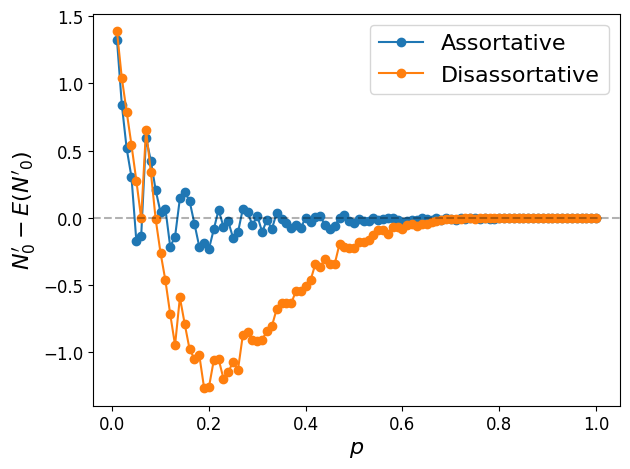

In [11]:
df = pd.read_csv("zeroNodesResults.dat", sep=" ", names = ["p", "assort", "sdassort", "theory", "disassort", "sddisassort"])

fig, ax = plt.subplots()

ax.plot(df["p"], df["assort"] - df["theory"],marker="o",label="Assortative")
ax.plot(df["p"], df["disassort"] - df["theory"],marker="o",label="Disassortative")
ax.set_xlabel("$p$", fontsize=16)
ax.set_ylabel("$N_0' - E(N'_0)$", fontsize=16)
ax.axhline(0, color='black', linestyle="--", alpha=0.3)

plt.legend(loc="upper right",fontsize=16)
plt.tight_layout()
plt.savefig("prettyGraphZeros.png")
plt.show()

# Figure 3: Triangle variance

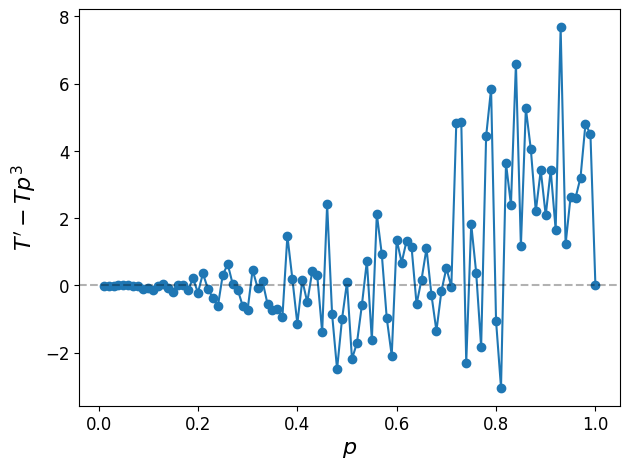

In [12]:
df = pd.read_csv("BA_All_AssoTrian.txt", sep=" ", names = ["p", "y", "Tprime", "sd", "Tp3"])

fig, ax = plt.subplots()

df.plot("p","y", ax=ax, kind="line", marker="o", legend=False)
ax.set_xlabel("$p$", fontsize=16)
ax.set_ylabel("$T' - Tp^3$", fontsize=16)
ax.axhline(0, color='black', linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("prettyGraph.png")
plt.show()

# Figure 4: Degree Error

In [13]:
def degree_plot(folder, net_name):
    results_df = pd.read_csv(folder+"/degree_error_dataframe.csv")

    plt.rc('xtick',labelsize=16) 
    plt.rc('ytick',labelsize=16)

    ## Comment below out if not using dark mode ;)
    fig, ax = plt.subplots(figsize=(7,5))
    plot_shaded_bars_sqrt(p_range,results_df["mme_mean"],results_df["mme_sd"],ax, marker="o",label="MME")
    plot_shaded_bars_sqrt(p_range,results_df["csc_mean"],results_df["csc_sd"],ax, marker="s",label="Link Cascade")
    plot_shaded_bars_sqrt(p_range,results_df["monte_carlo_mean"],results_df["monte_carlo_sd"],ax, marker="P",label="Minimisation method")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_mc_mean"],results_df["bayes_mc_sd"],ax, marker="*",label="Bayes with minimisation \n method prior")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_csc_mean"],results_df["bayes_csc_sd"],ax, marker="D",label="Bayes with Link \n Cascade prior")
    plot_shaded_bars_sqrt(p_range,results_df["bayes_true_mean"], results_df["bayes_true_sd"],ax, marker="x", label="Bayes with true prior")

    #ax.set_yscale('log')
    ax.legend(loc="upper right", fontsize=16)
    plt.xlabel("$p$", fontsize=16)
    plt.ylabel("RMSE $(\hat{k}_i)$", fontsize=16)
    plt.tight_layout()

    plt.savefig(folder+"/"+net_name+"degree_mse_cn22.png")
    plt.show()

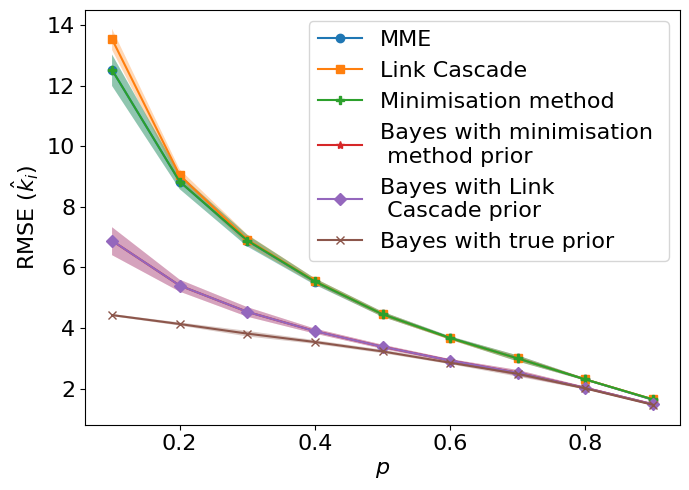

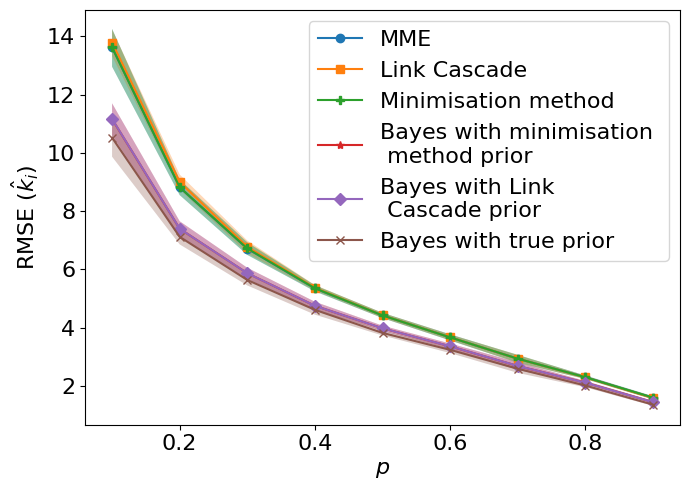

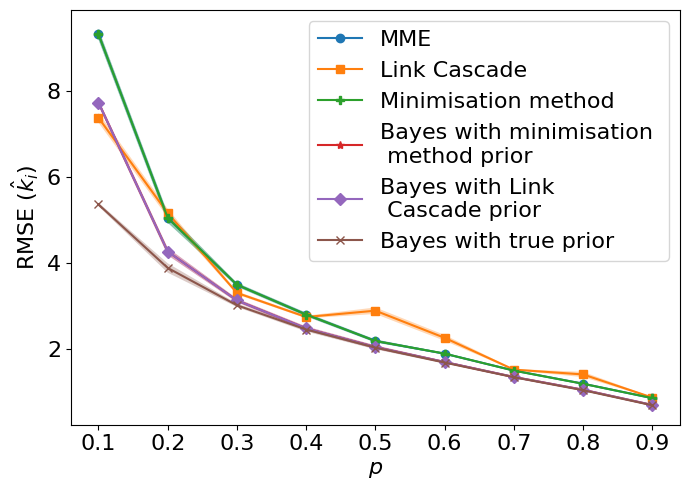

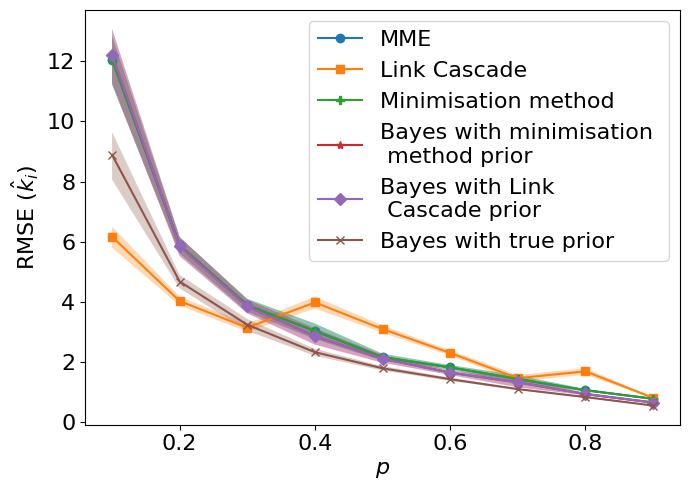

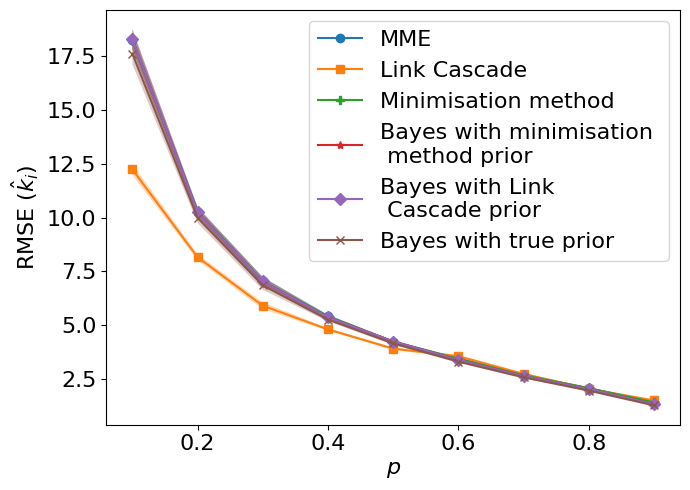

In [14]:
for i in range(5):
    degree_plot(folders[i],names[i])

# Figure 5: Plotting Degree vs Estimated Degree

In [15]:
folders = ["ER_FILES", "BA_FILES", "HepThToNaomi", "InterNaomi", "STACKEX"]
names = ["ER", "BA", "HEPTH", "INTER", "SX"]

def degplot(i,p):
    fig, ax = plt.subplots(figsize=(7,3.2))
    
    folder = folders[i]
    name = names[i]

    degree_df = pd.read_csv(folder+"/deg-sequences-"+str(round(p,1))+".csv")

    ax.axline((0, 0), slope=1,color="black", linestyle="--", alpha=0.3)
    ax.scatter(x=degree_df.true_degrees, y=degree_df.mme.apply(round), label="MME")
    ax.scatter(x=degree_df.true_degrees, y=degree_df.bayes_mc.apply(round), label="Bayes with MC Prior", marker="x")
    ax.set_xlabel("True degree $k$",fontsize=16)
    ax.set_ylabel("Estimated degree $\hat{k}$",fontsize=16)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, color="black", linestyle="--", alpha=0.3)
    # ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    plt.legend(loc="upper left", fontsize=16)
    plt.tight_layout()
    plt.savefig("paper_pics/"+name+"deg_vs_predicted"+str(round(p,1))+".png")
    plt.show()

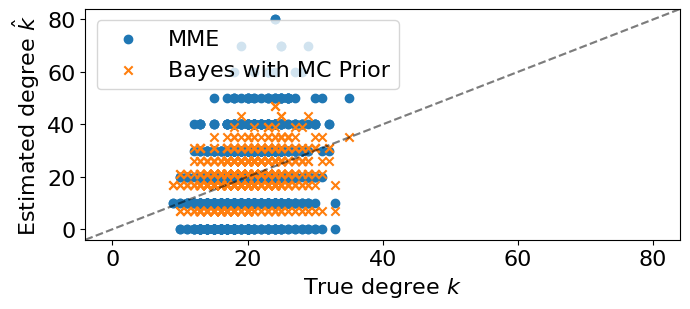

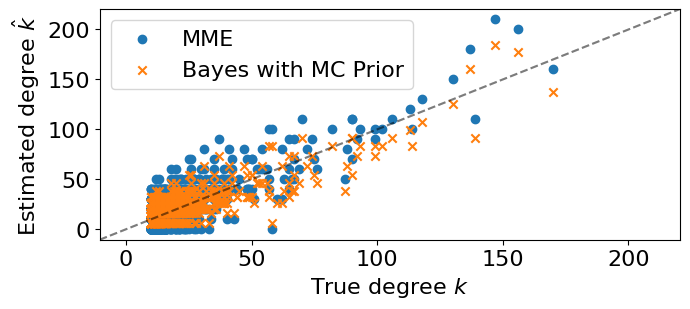

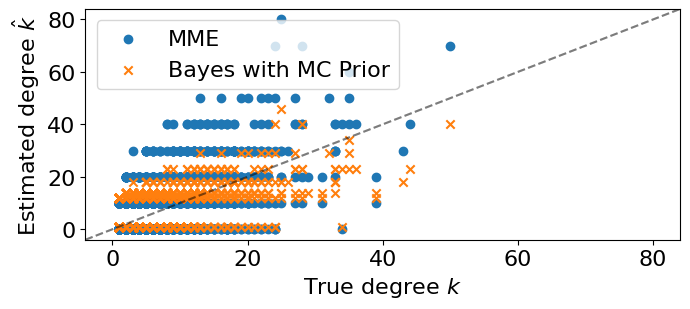

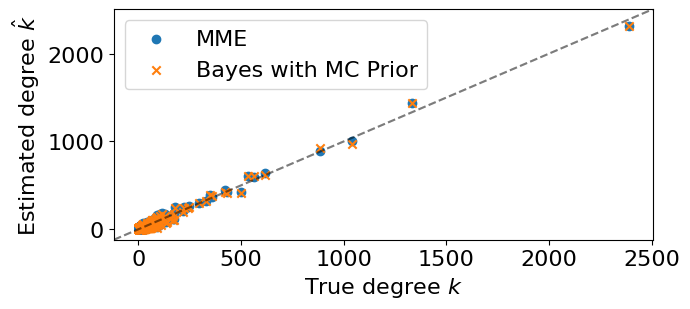

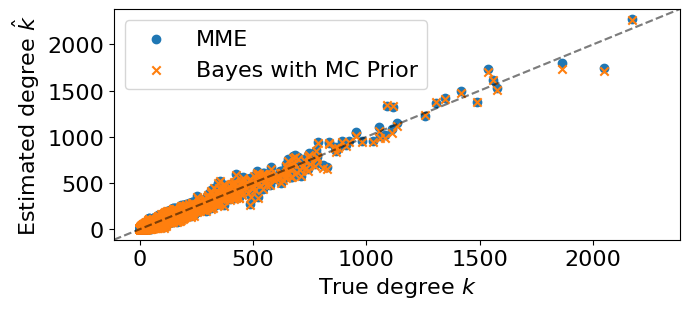

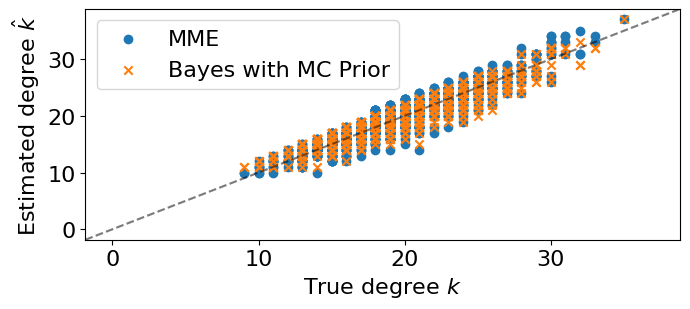

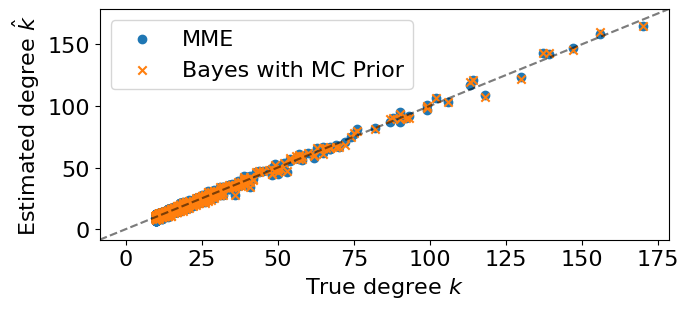

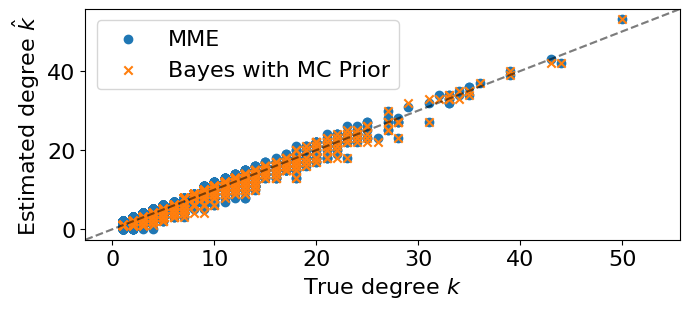

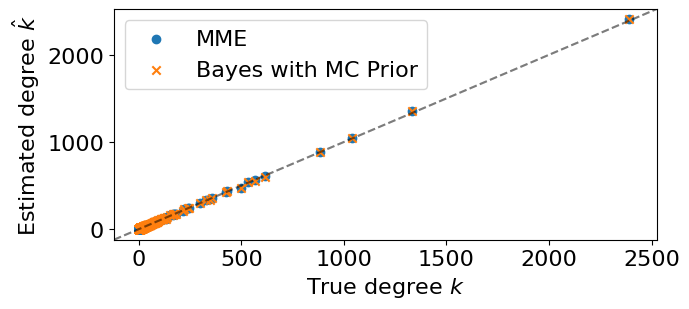

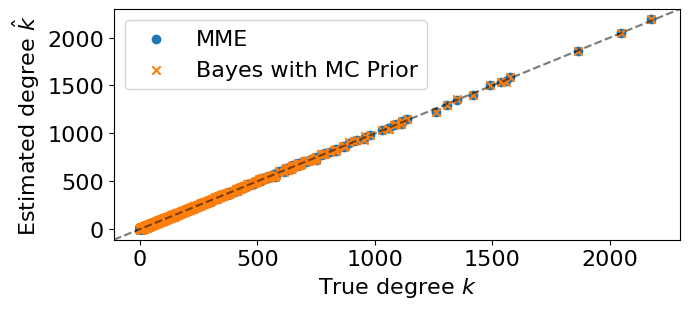

In [16]:
for p in [0.1,0.9]:
    for i in range(5):
        degplot(i,p)

# Figure 6: Triangle error plots

In [17]:
def triangle_plot(folder, netname):
    plt.style.use("default")
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)

    df = pd.read_csv(folder+"/tri_error_dataframe.csv")

    figsize=(7,5)
    
    fig, ax1 = plt.subplots(figsize=(7,3.2))

    plot_shaded_bars_sqrt(p_range,df["mme_dist_mean"],df["mme_dist_sd"],ax1,label="MME", marker="o")
    plot_shaded_bars_sqrt(p_range,df["bayes_dist_mean"],df["bayes_dist_sd"],ax1,label="Bayes Poisson Prior", marker="^")
    plot_shaded_bars_sqrt(p_range,df["bayes_dist_true_mean"],df["bayes_dist_true_sd"],ax1,label="Bayes True Prior", marker="x")

    ax1.set_xlabel("p",fontsize=16)
    ax1.legend(loc="upper right",fontsize=16)
    ax1.set_ylabel("RMSE$(\hat{T_l})$",fontsize=16)

    plt.tight_layout()
    plt.savefig("paper_pics/"+netname+"_tri_seq_plot.png")
    plt.show()

    fig, ax2 = plt.subplots(figsize=(7,3.2))

    plot_shaded_bars_sqrt(p_range,df["mme_tot_mean"],df["mme_tot_sd"],ax2,label="MME", marker="o")
    plot_shaded_bars_sqrt(p_range,df["bayes_tot_mean"],df["bayes_tot_sd"],ax2,label="Bayes Poisson Prior", marker="^")
    plot_shaded_bars_sqrt(p_range,df["bayes_tot_true_mean"],df["bayes_tot_true_sd"],ax2,label="Bayes True Prior", marker="x")

    ax2.legend(loc="upper right",fontsize=16)
    ax2.set_xlabel("p",fontsize=16)
    ax2.set_ylabel("RMSE $(\hat{T})$",fontsize=16)

    plt.tight_layout()
    plt.savefig("paper_pics/"+netname+"_tri_tot_plot.png")

    # plt.show()

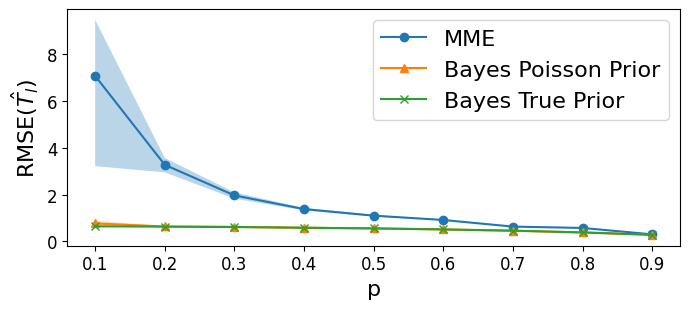

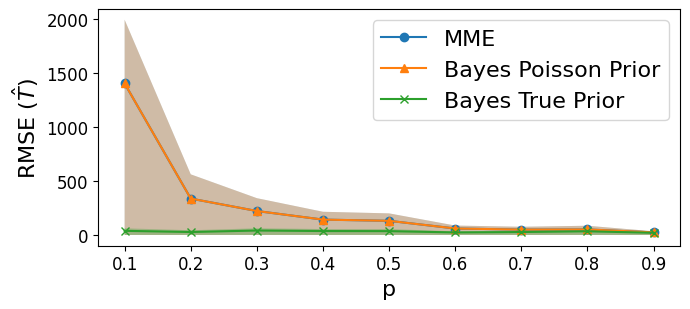

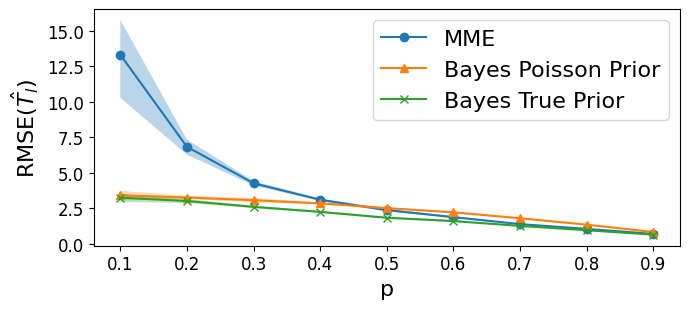

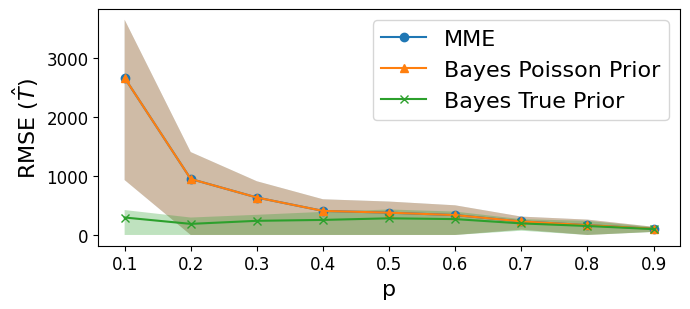

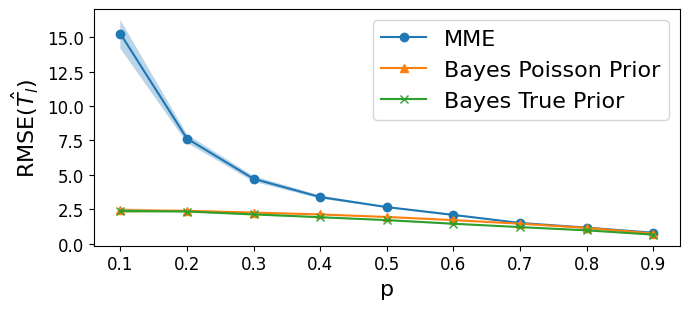

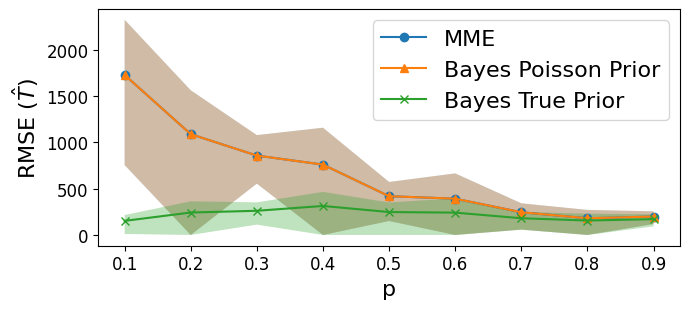

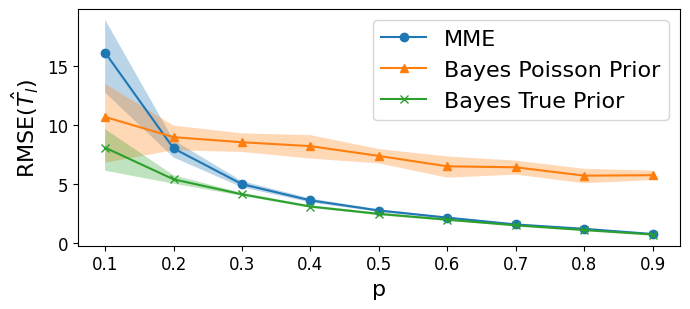

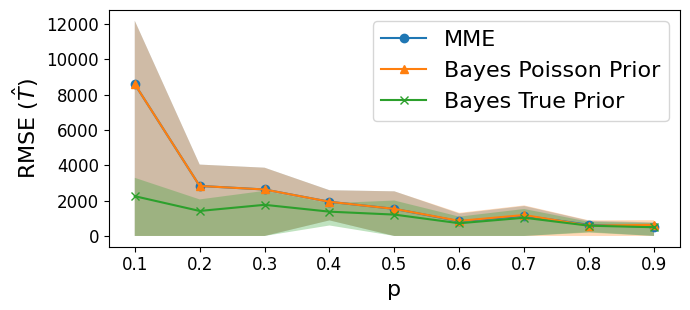

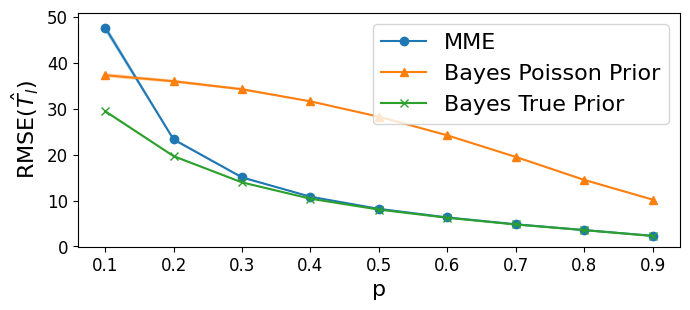

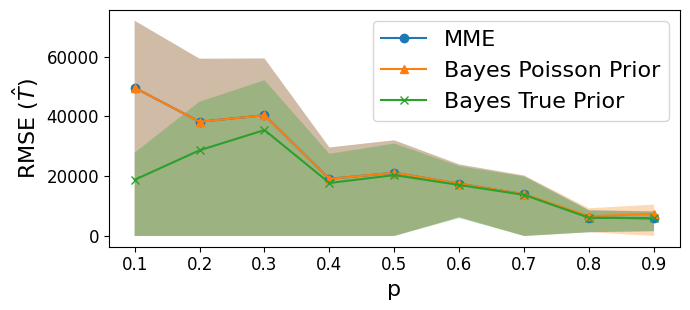

In [18]:
folders = ["ER_FILES", "BA_FILES", "HepThToNaomi", "InterNaomi", "STACKEX"]
names = ["ER", "BA", "HEPTH", "INTER", "SX"]

for i in range(5):
    triangle_plot(folders[i],names[i])

# Figure 7: Triangles real vs estimated

In [19]:
def tri_plot(i,p):
    if (i,p) == (0,0.1):
        loc="lower right"
    elif (i,p) == (1,0.1):
        loc = "center left"
    elif (i,p) in [(2,0.1), (3,0.1), ]:
        loc = "upper right"
    elif (i,p) == (4,0.1):
        loc = "center right"
    else:
        loc="upper left"

    fig, ax = plt.subplots(figsize=(7,3.2))
    folder = folders[i]
    name = names[i]

    tri_df = pd.read_csv(folder+"/tri_real_vs_estimated_"+str(round(p,1))+".csv")

    ax.scatter(x=tri_df.true, y=tri_df.mme.apply(round), label="MME")
    ax.scatter(x=tri_df.true, y=tri_df.bayes_pois.apply(round), label="Bayes Pois. Pri.", marker="x")
    ax.set_xlabel("True triangles per link $T_l$",fontsize=16)
    ax.set_ylabel("Estimated triangles \n per link $\hat{T_l}$",fontsize=16)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, color="black", linestyle="--", alpha=0.3)

    ax.set_xlim(lims)
    ax.set_ylim(lims)

    plt.legend(loc=loc,fontsize=16)
    plt.tight_layout()
    plt.savefig("paper_pics/"+name+"tri_vs_predicted"+str(round(p,1))+".png")
    plt.show()

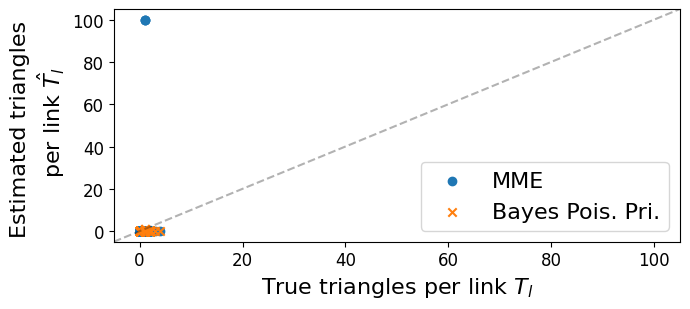

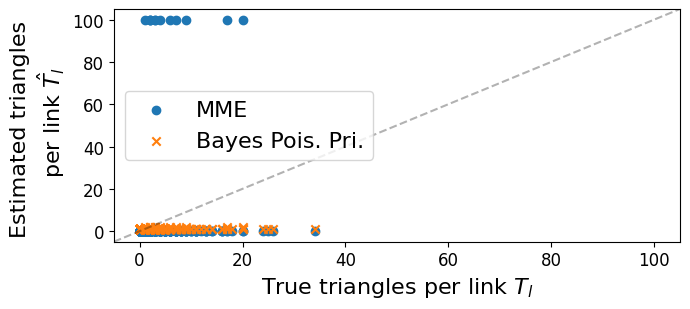

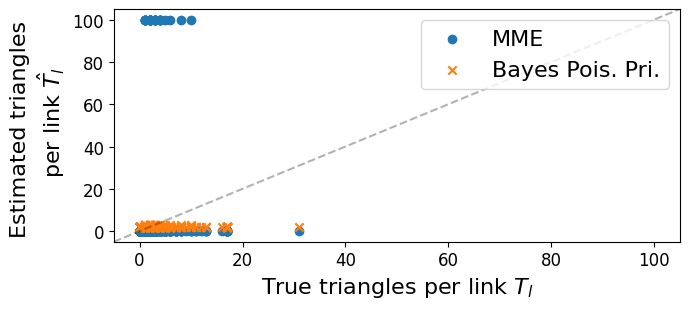

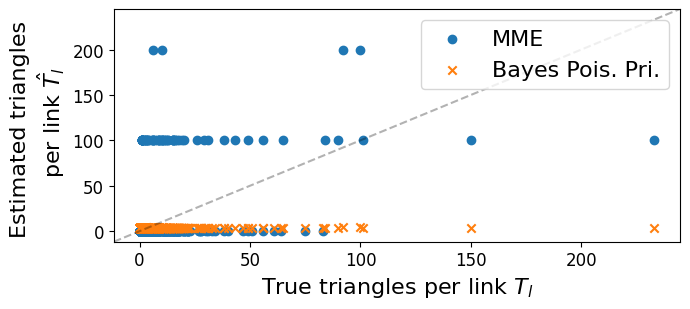

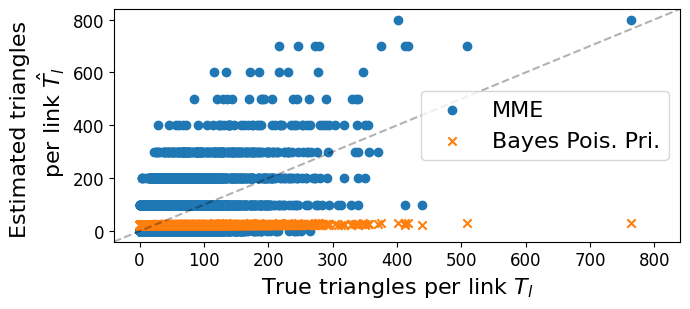

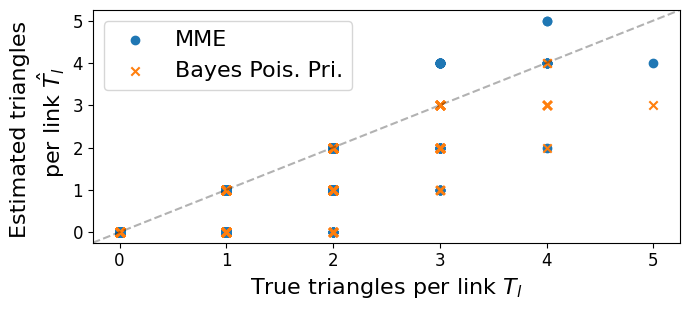

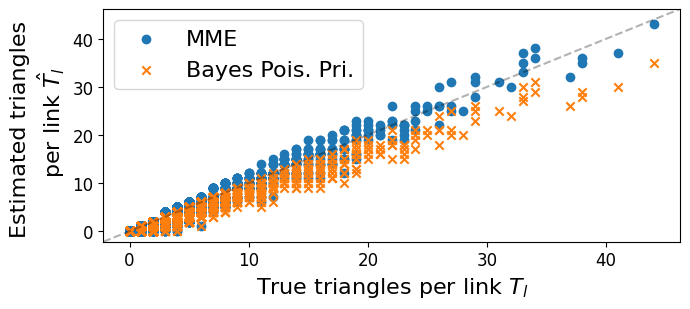

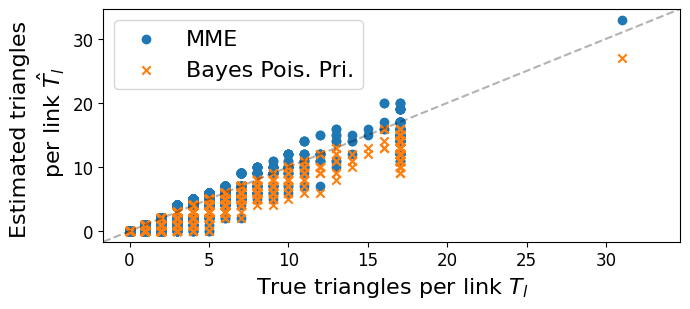

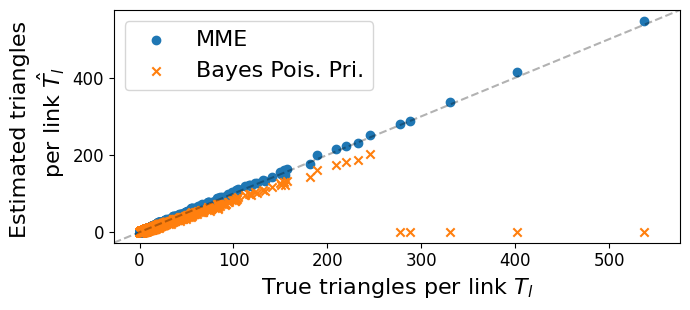

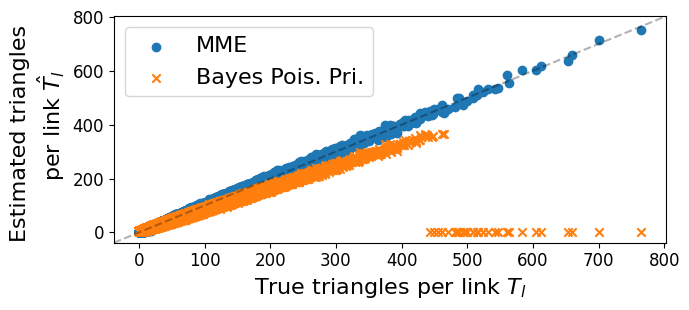

In [20]:
for p in [0.1,0.9]:
    for i in range(5):
        tri_plot(i,p)